In [1]:
from rosemary import jpt_in_notebook
from llm.submit import submit_job, multiline_to_singleline

shell_scripts_template = """
echo "Running on $SLURM_JOB_NODELIST"
echo "======"

master_addr=$(scontrol show hostnames "$SLURM_JOB_NODELIST" | head -n 1)
master_port=10002
RDZV_ENDPOINT=$master_addr:$master_port

source ~/.profile
conda activate open-instruct
cd /gpfs/u/scratch/PTFM/PTFMqngp/github/mitibm2023/external/open-instruct/scripts

set -e
set -x
echo "======"
srun {cmd}

[ ! -f "{log_dir}/$SLURM_JOB_ID*.out" ] && mv {log_dir}/$SLURM_JOB_ID*.out {save_dir}
"""
nodes = 1; gpus=6

test_run = 0
test_run = bool(test_run)


model_name = 'llama-7b'; model_name_or_path = '../results/baselines/huggyllama/llama-7b'
model_name = 'llama-7b_ft=hmv1'; model_name_or_path = '../results/ft1/llama-7b_humanmix'

save_dir = f"/gpfs/u/home/PTFM/PTFMqngp/scratch/github/mitibm2023/external/open-instruct/scripts/model_outputs/{model_name}"
log_dir = '/gpfs/u/home/PTFM/PTFMqngp/scratch/github/mitibm2023/external/open-instruct/scripts/'

# datasets = ['flan2022_1m']; nodes = 2; gpus=6; cpu_mem = 512
# datasets = ['cot', 'dolly', 'flan_v2', 'lima', 'oasst1']; nodes = 1; gpus=6; cpu_mem = 512
datasets = ['tulu_v1_human_mix', 'tulu_v2_human_mix']; nodes = 1; gpus=1; cpu_mem = 64

# datasets = ['flan_v2']; nodes = 1; gpus=6; cpu_mem = 512



for dataset in datasets:
    cmd = f"""
    torchrun --nnodes={nodes} --nproc_per_node={gpus} \
        --rdzv-id=$SLURM_JOB_ID --rdzv-backend=c10d --rdzv-endpoint=$RDZV_ENDPOINT \
        note_llama_embeddings.py \
        --dataset {dataset} \
        --model_name_or_path {model_name_or_path} \
        --save_dir {save_dir} \
        --use_dist \
        --shuffle
    """
    cmd = multiline_to_singleline(cmd)

    shell_scripts = shell_scripts_template.format(
        cmd=cmd, log_dir=log_dir, save_dir=save_dir)
    out = submit_job(
        shell_scripts, 
        job_name=f'LM_outputs.{dataset}', 
        nodes=nodes,
        num_cpus=32,
        cpu_mem=cpu_mem,
        num_gpus=gpus,
        gpu_type='v100',
        test_run=test_run,
        job_duration=6,
    )
    print(cmd)
    if not test_run:
        print(out)


Submiting job with:
{
    "job_name": "LM_outputs.tulu_v1_human_mix",
    "nodes": 1,
    "num_cpus": 32,
    "cpu_mem": 64,
    "num_gpus": 1,
    "gpu_type": "v100",
    "test_run": false,
    "queue": "el8",
    "num_jobs": 1
}
torchrun --nnodes=1 --nproc_per_node=1 --rdzv-id=$SLURM_JOB_ID --rdzv-backend=c10d --rdzv-endpoint=$RDZV_ENDPOINT note_llama_embeddings.py --dataset tulu_v1_human_mix --model_name_or_path ../results/ft1/llama-7b_humanmix --save_dir /gpfs/u/home/PTFM/PTFMqngp/scratch/github/mitibm2023/external/open-instruct/scripts/model_outputs/llama-7b_ft=hmv1 --use_dist --shuffle
[{'args': 'sbatch --job-name=LM_outputs.tulu_v1_human_mix --partition=el8 --nodes=1 --ntasks-per-node=1 --cpus-per-task=32 --mem=64GB --gres=gpu:1 --output=/gpfs/u/scratch/PTFM/PTFMqngp/github/mitibm2023/external/open-instruct/scripts/%J.out --time=6:00:00 /gpfs/u/scratch/PTFM/PTFMqngp/github/mitibm2023/external/open-instruct/scripts/tmpqmqmpmmg', 'job_id': 986379}]

Submiting job with:
{
    "job

/gpfs/u/scratch/PTFM/PTFMqngp/github/rosemary/src/rosemary/__init__.py:25: UserWarning: Install `torch` for functionalities dependent on torch
  warn(f'Install `torch` for functionalities dependent on torch')


In [5]:
p = '/gpfs/u/home/PTFM/PTFMqngp/scratch/github/mitibm2023/external/open-instruct/scripts/model_outputs/llama-7b/lima.pkl'
with open(p, 'rb') as f:
    x = pickle.load(f)
x

{'text_embeddings': array([[-1.0107422 ,  0.3317871 , -0.32666016, ...,  0.02334595,
          0.48999023,  0.3395996 ],
        [-1.1972656 ,  1.6523438 , -0.7988281 , ...,  0.22070312,
          1.1552734 ,  0.8984375 ],
        [-0.76123047, -0.5239258 ,  0.2758789 , ...,  1.1494141 ,
          0.50878906,  0.15466309],
        ...,
        [-0.77246094,  0.8745117 , -0.36572266, ...,  0.27905273,
          1.1367188 , -0.0027523 ],
        [-1.1875    ,  0.27075195, -1.0205078 , ..., -0.29956055,
          0.625     ,  0.04116821],
        [-0.96435547,  0.26367188, -0.9785156 , ...,  0.25585938,
          0.85595703,  0.39916992]], dtype=float32),
 'log_probs': array([[-1.857992 ],
        [-2.2157798],
        [-1.5617336],
        ...,
        [-2.0540106],
        [-1.8325413],
        [-1.8836874]], dtype=float32),
 'el2ns': array([[0.60279465],
        [0.66627216],
        [0.5199953 ],
        ...,
        [0.6193907 ],
        [0.62892884],
        [0.59504163]], dtype=flo

Text(0, 0.5, 'el2n')

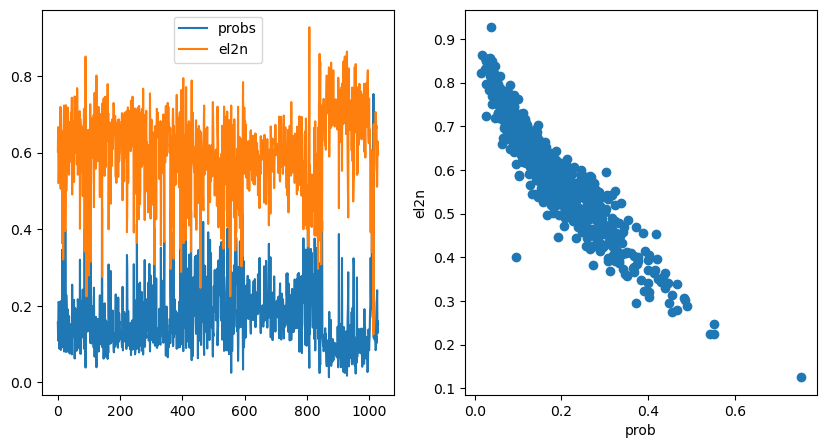

In [17]:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2,figsize=(10,5))

ax = axs[0]
ax.plot(np.exp(x['log_probs']), label='probs')
ax.plot(x['el2ns'], label='el2n')
ax.legend()

ax = axs[1]
ax.scatter(np.exp(x['log_probs']), x['el2ns'])
ax.set_xlabel('prob')
ax.set_ylabel('el2n')


In [51]:
import os

processed_dir = '../data/processed'
datasets = []
for dataset in os.listdir(processed_dir) + ['tulu_v1_human_mix', 'tulu_v2_human_mix']:
    dataset_path = os.path.join(processed_dir, dataset)
    save_path = os.path.join(save_dir, f'{dataset}.pkl')
    if 'tulu'==dataset:
        continue
    if 'tulu' not in dataset and not os.path.isdir(dataset_path):
        continue
    if os.path.isfile(save_path):
        continue
    datasets.append(dataset)
    
datasets
    

['flan2022']

In [18]:
from rosemary import jpt_parse_args, jpt_setup, jpt_in_notebook; jpt_setup()

if jpt_in_notebook():
    import os
    
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2,3'
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from functools import partial
import os
import numpy as np
import time
import random
import pickle
from tqdm import tqdm 

import pyarrow # import before `torch`, `transformers`, `datasets`
import torch
from torch.utils.data import DataLoader

from datasets import load_dataset

from transformers import AutoModelForCausalLM, AutoTokenizer

from open_instruct.finetune_trainer import encode_with_prompt_completion_format, encode_with_messages_format
from note_llama_embeddings import combine_lm_outputs_for_mixes, datasets_shard_chunk_size, compute_el2n


In [58]:
test_run = True
shuffle = False

model_name = 'llama-7b'; model_name_or_path = '../results/baselines/huggyllama/llama-7b'
save_dir = f"/gpfs/u/home/PTFM/PTFMqngp/scratch/github/mitibm2023/external/open-instruct/scripts/model_outputs/{model_name}"
os.makedirs(save_dir, exist_ok=True)

In [20]:
model = AutoModelForCausalLM.from_pretrained(
    model_name_or_path,
    device_map='cuda:0',
    torch_dtype=torch.float16)
model.eval()

tokenizer = AutoTokenizer.from_pretrained(
    model_name_or_path, use_fast=True)
tokenizer.padding_side = 'left'
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    tokenizer.pad_token_id = tokenizer.eos_token_id

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [23]:
dataset = 'lima'
dataset = 'flan_v2'
use_dist = False
shuffle = True


if dataset in ['tulu_v1_human_mix', 'tulu_v2_human_mix']:
    combine_lm_outputs_for_mixes(dataset, save_dir)


if use_dist:
    dist.init_process_group("gloo", timeout=datetime.timedelta(hours=6))
    world_size = dist.get_world_size()
    rank = dist.get_rank() # global rank
    local_rank = int(os.environ["LOCAL_RANK"])
else:
    rank = 0
    local_rank = 0
    world_size = 1

print(f'rank/local_rank/world_size: {rank}/{local_rank}/{world_size}\n')

device = f'cuda:{str(local_rank)}'


rank/local_rank/world_size: 0/0/1



In [26]:
processed_dir = '../data/processed'
if 'flan2022' in dataset:
    train_file = os.path.join(processed_dir, 'flan2022', f'{dataset}_data.jsonl')
else:
    train_file = os.path.join(processed_dir, dataset, f'{dataset}_data.jsonl')
assert(os.path.isfile(train_file))


encode_function = partial(
    encode_with_messages_format, tokenizer=tokenizer, max_seq_length=2048)

if rank == 0:
    raw_datasets = load_dataset("json", data_files={'train': train_file})
    # if test_run:
    #     raw_datasets['train'] = raw_datasets['train'].select(range(100))
    print(f"{dataset} dataset length = {len(raw_datasets['train'])}")
    lm_datasets = raw_datasets.map(
        encode_function, batched=False, num_proc=16,
        desc="Tokenizing and reformatting instruction data")
if use_dist:
    dist.barrier()
if rank!= 0:
    raw_datasets = load_dataset("json", data_files={'train': train_file})
    # if test_run:
    #     raw_datasets['train'] = raw_datasets['train'].select(range(100))
    print(f"{dataset} dataset length = {len(raw_datasets['train'])}")
    lm_datasets = raw_datasets.map(
        encode_function, batched=False, num_proc=16,
        desc="Tokenizing and reformatting instruction data")

    

train_dataset = lm_datasets['train']
train_dataset.set_format(
    type="torch",
    output_all_columns=False,
    columns=['input_ids', 'labels', 'attention_mask'])
if shuffle:
    random.seed(0)
    shuffle_inds = list(range(len(train_dataset)))
    random.shuffle(shuffle_inds)
    reverse_shuffle_inds = [(i, ind) for i, ind in enumerate(shuffle_inds)]
    reverse_shuffle_inds = sorted(reverse_shuffle_inds, key=lambda x: x[1])
    reverse_shuffle_inds = [x[0] for x in reverse_shuffle_inds]
    train_dataset = train_dataset.select(shuffle_inds)
train_dataset_chunk_sizes = [datasets_shard_chunk_size(len(train_dataset), num_shards=world_size, index=i) 
            for i in range(world_size)]
train_dataset = train_dataset.shard(
    num_shards=world_size, 
    index=rank,
    contiguous=True)
loader = DataLoader(train_dataset, shuffle=False, batch_size=1, pin_memory=True) 

Found cached dataset json (/gpfs/u/scratch/PTFM/PTFMqngp/huggingface_cache/datasets/json/default-486fcbba36f2e93b/0.0.0/8bb11242116d547c741b2e8a1f18598ffdd40a1d4f2a2872c7a28b697434bc96)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at /gpfs/u/scratch/PTFM/PTFMqngp/huggingface_cache/datasets/json/default-486fcbba36f2e93b/0.0.0/8bb11242116d547c741b2e8a1f18598ffdd40a1d4f2a2872c7a28b697434bc96/cache-9c45a2afaaa24846_*_of_00016.arrow


flan_v2 dataset length = 100000


In [29]:
text_embeddings = []
log_probs = []
el2ns = []
for i, batch in enumerate(tqdm(loader, disable=rank!=0, total=len(loader))):
    if i<6749: continue
    print(i)
    batch = {k: v.to(device, non_blocking=True) for k, v in batch.items()}
    with torch.inference_mode():
        outputs = model(**batch, output_hidden_states=True)

    # (bsz, seq_len, hidden_size) -> (bsz, hidden_size)
    text_embedding = outputs['hidden_states'][-1].mean(1)
    # average of output token log probs
    log_prob = -outputs['loss']
    # compute EL2N score
    el2n = compute_el2n(outputs['logits'], batch['labels'])

    text_embeddings.append(text_embedding.detach().cpu())
    log_probs.append(log_prob.detach().cpu())
    el2ns.append(el2n.detach().cpu())

    break

  7%|▋         | 6694/100000 [00:05<00:57, 1633.75it/s]

6749


  7%|▋         | 6749/100000 [00:05<01:19, 1176.06it/s]


IndexError: too many indices for tensor of dimension 1

In [70]:
print("outputs['logits']: ", outputs['logits'].shape)
print("batch['labels']: ", batch['labels'].shape)


el2n = compute_el2n(outputs['logits'], batch['labels'])

outputs['logits']:  torch.Size([1, 2048, 32001])
batch['labels']:  torch.Size([1, 2048])


In [71]:
el2n

tensor(0.0411, device='cuda:0')

In [65]:
x = (shift_labels==-200).nonzero().reshape(-1)

if x.size()[0] == 0:
    return torch.tensor(np.nan, device='cuda:0')


0

In [66]:
el2n

tensor(0.0411, device='cuda:0')

In [69]:
torch.tensor(np.nan, device='cuda:0')


tensor(nan, device='cuda:0')

In [144]:

labels = batch['labels']
logits = outputs['logits']



compute_el2n(logits, labels)

tensor(0.6028, device='cuda:0')

In [145]:


def compute_el2n(logits, labels):
    if logits.shape[0]!=1:
        raise ValueError('compute_el2n supports bsz=1 only.')
    # (Bsz, |Seq|, |Vocab|)
    # Shift so that tokens < n predict n
    shift_logits = logits[..., :-1, :].contiguous()
    shift_labels = labels[..., 1:].contiguous()
    # Flatten the tokens
    # (Bsz*|Seq|, |Vocab|)
    shift_logits = shift_logits.view(-1, model.config.vocab_size)
    shift_probs = torch.nn.functional.softmax(shift_logits, dim=-1)
    shift_labels = shift_labels.view(-1)
    # only compute loss on the output tokens
    output_tok_indices = (shift_labels != -100).nonzero().squeeze()
    shift_labels = shift_labels[output_tok_indices]
    shift_probs = shift_probs[output_tok_indices]
    shift_logits = shift_logits[output_tok_indices]

    # Enable model parallelism
    shift_labels = shift_labels.to(shift_logits.device)
    # Compute EL2N = || prob - one-hot-y ||_2
    shift_probs[torch.arange(shift_probs.size(0)), shift_labels] -= 1
    loss = torch.norm(shift_probs, dim=-1).mean()
    return loss

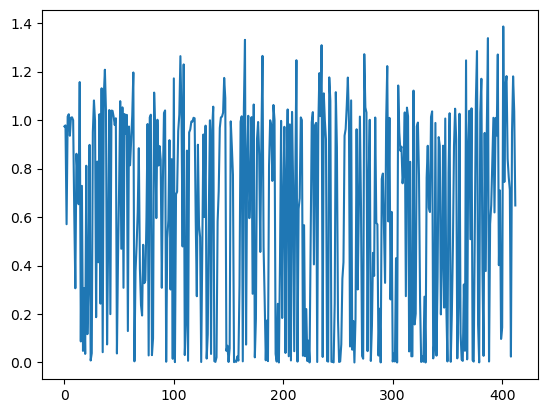

In [132]:
plt.plot(loss.to('cpu').numpy())

In [124]:

# Example matrices
probabilities = torch.tensor([[0.2, 0.3, 0.5],
                              [0.1, 0.7, 0.2],
                              [0.6, 0.1, 0.3]])

# one_hot_labels = torch.tensor([[0, 1, 0],
#                                [1, 0, 0],
#                                [0, 0, 1]])


# one_hot_labels = torch.tensor([1,0,2]).view(-1)


# probabilities[torch.arange(probabilities.size(0)), one_hot_labels] *= -1

# probabilities

In [121]:
loss

tensor(1.8580, device='cuda:0')